In [14]:
import sys
sys.path.append('../src')
import util
import numpy as np
from networkx import nx
from synth_generate import make_rp_graph
from collections import Counter
import plfit
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
G1 = nx.barabasi_albert_graph(n=5000, m=4)
G2 = make_rp_graph('directed'  , n_max=5000*4, r=1, p=0.01, grow=True, m=4, directed=True)[0]
G3 = make_rp_graph('undirected', n_max=5000*4, r=1, p=0, grow=True, m=4, directed=False)[0]

In [22]:
print("Graph 1 has %d nodes and %d edges" % (G1.number_of_nodes(), G1.number_of_edges()))
print("Graph 2 has %d nodes and %d edges" % (G2.number_of_nodes(), G2.number_of_edges()))
print("Graph 3 has %d nodes and %d edges" % (G3.number_of_nodes(), G3.number_of_edges()))

Graph 1 has 5000 nodes and 19984 edges
Graph 2 has 5000 nodes and 20000 edges
Graph 3 has 5003 nodes and 20002 edges


In [23]:
degs1 = Counter(dict(G1.degree()).values())
degs2 = Counter(dict(G2.in_degree()).values())
degs3 = Counter(dict(G3.degree()).values())

In [26]:
gamma1 = plfit.plfit(dict(G1.degree()).values())._alpha
gamma2 = plfit.plfit(dict(G2.in_degree()).values())._alpha
gamma3 = plfit.plfit(dict(G3.degree()).values())._alpha
print("Graph 1 has gamma=%.3f and 'p'=%.3f" % (gamma1, (gamma1-3)/(gamma1-1)))
print("Graph 2 has gamma=%.3f and 'p'=%.3f" % (gamma2, (gamma2-2)/(gamma2-1)))
print("Graph 3 has gamma=%.3f and 'p'=%.3f" % (gamma3, (gamma3-3)/(gamma3-1)))

Graph 1 has gamma=2.849 and 'p'=-0.082
Graph 2 has gamma=1.540 and 'p'=-0.851
Graph 3 has gamma=2.791 and 'p'=-0.116


/Users/janovergoor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in power
/Users/janovergoor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in power
/Users/janovergoor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in power


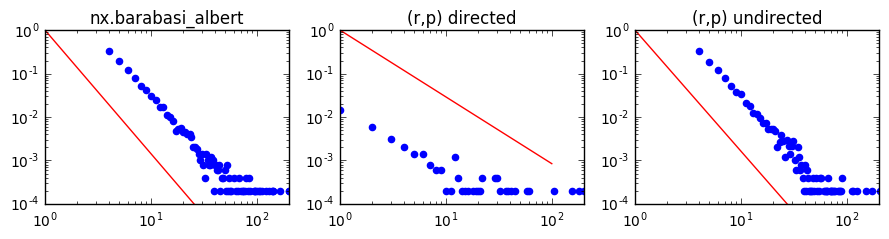

In [29]:
plt.figure(figsize=(9,2.5))
plt.subplot(131)
plt.scatter(degs1.keys(), [float(y)/sum(degs1.values()) for y in degs1.values()], color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 200)
plt.ylim(0.0001, 1)
plt.plot(np.arange(100), np.power(np.arange(100),-gamma1), color='r')
plt.title("nx.barabasi_albert")

plt.subplot(132)
plt.scatter(degs2.keys(), [float(y)/sum(degs2.values()) for y in degs2.values()], color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 200)
plt.ylim(0.0001, 1)
plt.plot(range(100), np.power(np.arange(100),-gamma2), color='r')
plt.title("(r,p) directed")

plt.subplot(133)
plt.scatter(degs3.keys(), [float(y)/sum(degs3.values()) for y in degs3.values()], color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 200)
plt.ylim(0.0001, 1)
plt.plot(range(100), np.power(np.arange(100),-gamma3), color='r')
plt.title("(r,p) undirected")

plt.tight_layout()
#plt.show()

In [ ]:
import plfit
from numpy.random import rand,seed
# generate a power law using the "inverse" power-law generator code
X=plfit.plexp_inv(rand(1000),1,2.5)
# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit=plfit.plfit(X,usefortran=False)
# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695
# generate some plots
from pylab import *
figure(1)
myplfit.plotpdf()
figure(2)
myplfit.plotcdf()

In [ ]:
#max(dict(G.degree()).values())
#np.mean(dict(G.degree()).values())
#nx.__version__
#dict(G2.degree()).values()

print("Graph 2 has gamma=%.3f and 'p'=%.3f" % (gamma2, 1.0/(gamma2-1)))
degs3 = {0: 1111, 1: 360, 2: 157, 3: 95, 4: 59, 5: 37, 6: 28, 8: 16, 7: 13, 9: 11, 14: 10, 11: 8, 13: 8, 15: 7, 17: 5, 12: 5, 10: 4, 16: 4, 18: 3, 20: 2, 21: 2, 23: 2, 26: 2, 27: 2, 28: 2, 31: 2, 46: 2, 24: 2, 48: 2, 73: 2, 36: 2, 129: 1, 396: 1, 19: 1, 22: 1, 536: 1, 29: 1, 30: 1, 32: 1, 33: 1, 34: 1, 35: 1, 550: 1, 41: 1, 45: 1, 50: 1, 52: 1, 54: 1, 58: 1, 63: 1, 67: 1, 77: 1, 78: 1, 79: 1, 84: 1, 85: 1, 214: 1, 92: 1, 93: 1, 350: 1, 96: 1, 97: 1, 105: 1, 112: 1, 627: 1, 124: 1}
gamma3 = plfit.plfit(degs3.values())._alpha
print("Graph 3 has gamma=%.3f and 'p'=%.3f" % (gamma3, 1.0/(gamma3-1)))
degs4 = {0: 1105, 1: 329, 2: 167, 3: 90, 4: 73, 5: 45, 7: 26, 6: 24, 8: 15, 9: 13, 10: 13, 14: 11, 11: 10, 12: 6, 13: 5, 27: 4, 28: 4, 19: 4, 21: 4, 23: 4, 16: 3, 26: 3, 18: 3, 39: 2, 20: 2, 47: 2, 38: 2, 32: 2, 538: 1, 437: 1, 498: 1, 473: 1, 553: 1, 174: 1, 199: 1, 45: 1, 78: 1, 132: 1, 83: 1, 145: 1, 90: 1, 84: 1, 64: 1, 108: 1, 42: 1, 40: 1, 93: 1, 182: 1, 15: 1, 34: 1, 71: 1, 49: 1, 63: 1, 55: 1, 17: 1, 65: 1, 25: 1}
gamma4 = plfit.plfit(degs4.values())._alpha
print("Graph 4 has gamma=%.3f and 'p'=%.3f" % (gamma4, 1.0/(gamma4-1)))
